In [184]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
plt.rcParams['figure.figsize'] = [8,5]

In [185]:
df = pd.read_csv('/kaggle/input/walmart-dataset/Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [186]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [187]:
df['Time'] = np.arange(len(df.index))
df['Lag_1'] = df['Weekly_Sales'].shift(1)
df['Lag_2'] = df['Weekly_Sales'].shift(2)

In [188]:


# Choose a specific start date (e.g., '2022-01-01')
start_date = pd.to_datetime('2022-01-01')

# Add 'Time' as weeks to the start date
df['Time'] = start_date + pd.to_timedelta(df['Time'], unit='W')

# Convert timedelta to seconds, divide by seconds in a week, and take modulo 52
df['Time'] = ((df['Time'] - start_date).dt.total_seconds() / (7 * 24 * 60 * 60)) % 52

# Optionally, you can reset the index if needed
df = df.reset_index(drop=True)



In [189]:
df = df.set_index('Date')

In [190]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Time,Lag_1,Lag_2
Date,,,,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,0.0,NaN,NaN
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106,1.0,1643690.90,NaN
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,2.0,1641957.44,1643690.90
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,3.0,1611968.17,1641957.44
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,4.0,1409727.59,1611968.17
...,...,...,...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684,34.0,723086.20,702238.27
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667,35.0,713173.95,723086.20
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667,36.0,733455.07,713173.95


In [191]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Time,Lag_1,Lag_2
Date,,,,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,0.0,NaN,NaN
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106,1.0,1643690.90,NaN
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,2.0,1641957.44,1643690.90
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,3.0,1611968.17,1641957.44
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,4.0,1409727.59,1611968.17


In [192]:
df.shape

(6435, 10)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6435 entries, 05-02-2010 to 26-10-2012
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Time          6435 non-null   float64
 8   Lag_1         6434 non-null   float64
 9   Lag_2         6433 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 553.0+ KB


### Weekly_Sales

<Axes: xlabel='Weekly_Sales', ylabel='Count'>

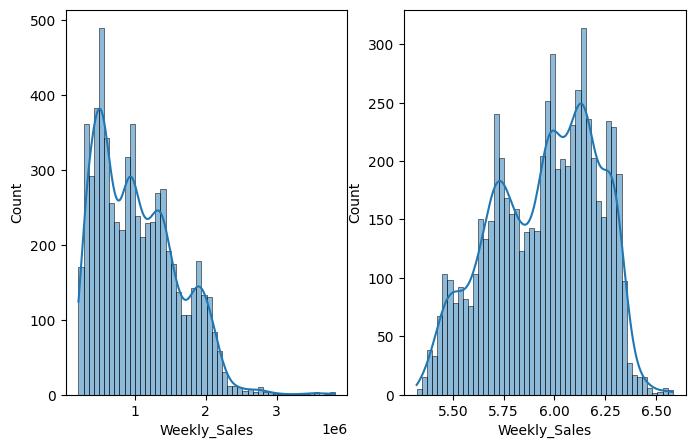

In [194]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.histplot(x='Weekly_Sales',data=df,kde=True,fill=True,bins=50,ax = ax1)
sns.histplot(np.log10(df['Weekly_Sales']),kde=True,fill=True,bins=50,ax=ax2)

### Holiday_Flag

<Axes: xlabel='Holiday_Flag', ylabel='count'>

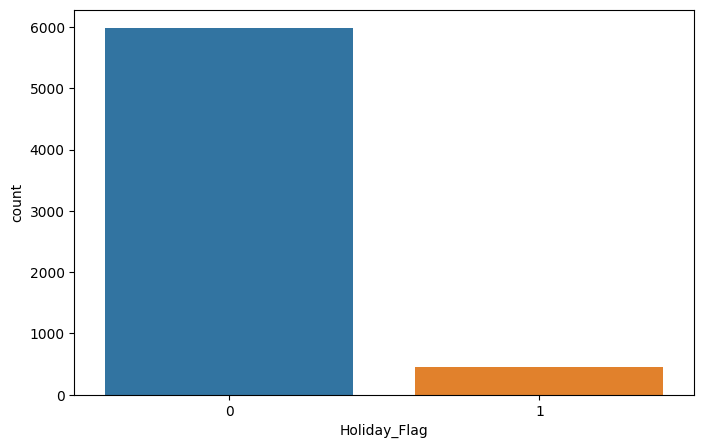

In [195]:
sns.countplot(x='Holiday_Flag',data=df)

<Axes: ylabel='count'>

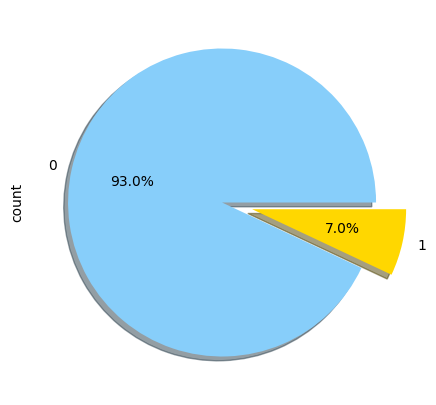

In [196]:
df['Holiday_Flag'].value_counts().plot(kind='pie',autopct='%.1f%%',explode=[0,0.2],colors=['lightskyblue','gold'],shadow=True)

### Temperature

<Axes: xlabel='Temperature', ylabel='Count'>

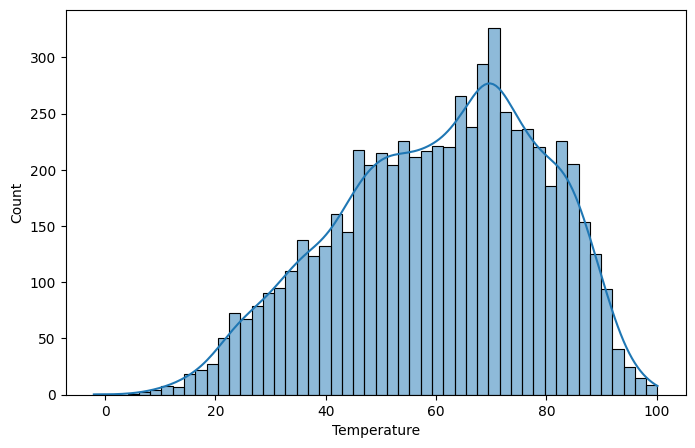

In [197]:
sns.histplot(x='Temperature',data=df,kde=True,bins=50)

### Fuel_Price

<Axes: xlabel='Fuel_Price', ylabel='Count'>

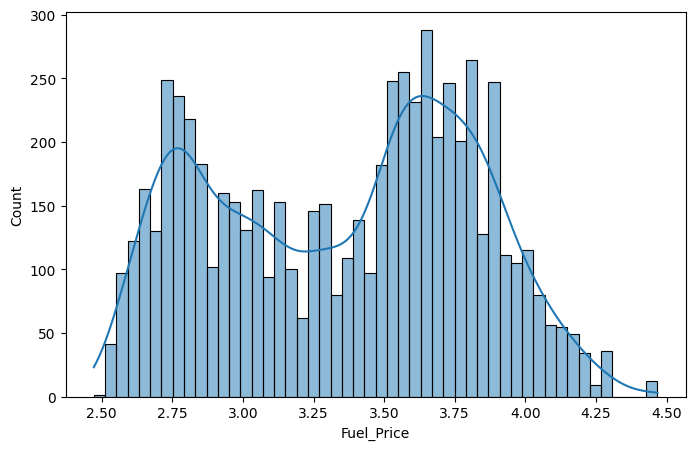

In [198]:
sns.histplot(x='Fuel_Price',data=df,kde=True,bins=50)

### CPI

<Axes: xlabel='CPI', ylabel='Count'>

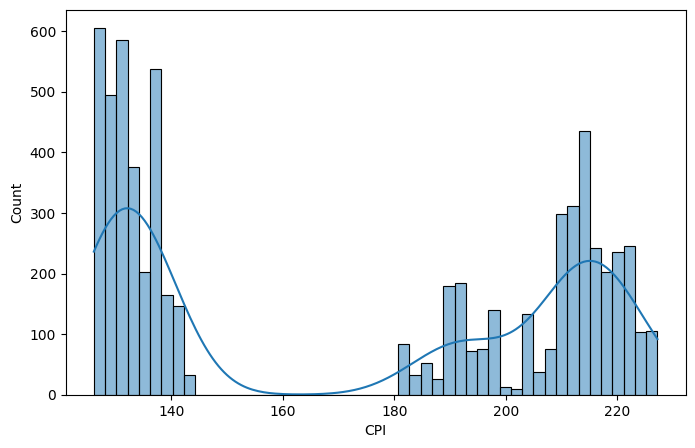

In [199]:
sns.histplot(x='CPI',data=df,kde=True,bins=50)

### Unemployment

<Axes: xlabel='Unemployment', ylabel='Count'>

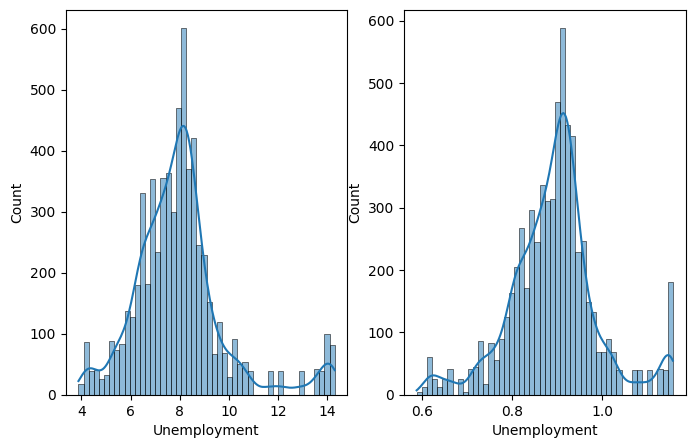

In [200]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.histplot(x='Unemployment',data=df,kde=True,fill=True,bins=50,ax=ax1)
sns.histplot(np.log10(df['Unemployment']),kde=True,fill=True,bins=50,ax=ax2)

### Weekly_Sales vs Store

<Axes: xlabel='Store', ylabel='Weekly_Sales'>

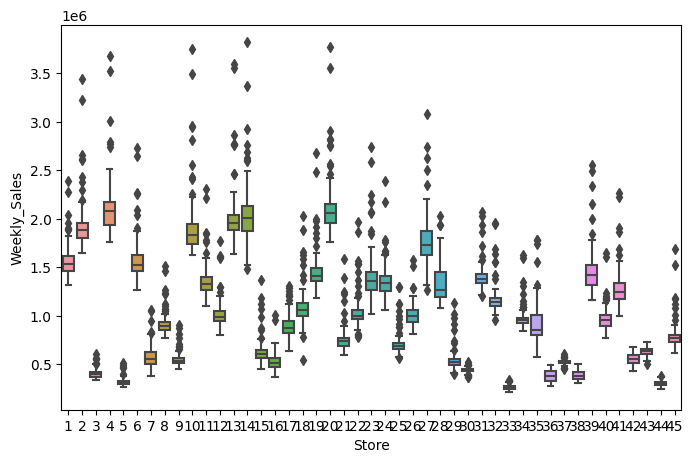

In [201]:
sns.boxplot(x='Store',y='Weekly_Sales',data=df)

### Weekly_Sales vs Holiday_Flag

<Axes: xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

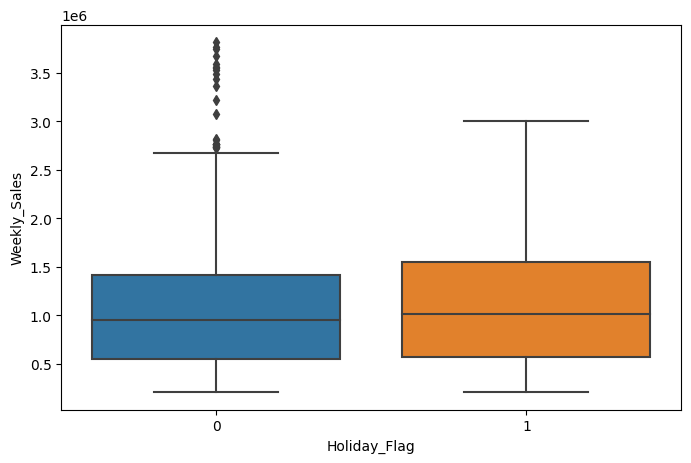

In [202]:
sns.boxplot(x='Holiday_Flag',y='Weekly_Sales',data=df)

### Weekly_Sales vs Temperature

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

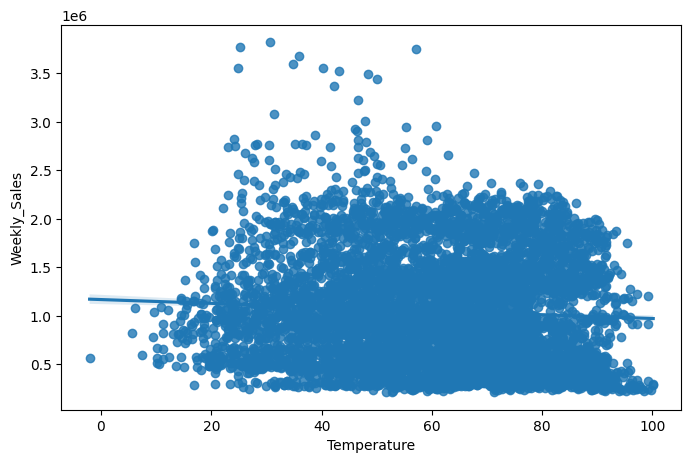

In [203]:
sns.regplot(x='Temperature',y='Weekly_Sales',data=df)

### Weekly_Sales vs Fuel_Price

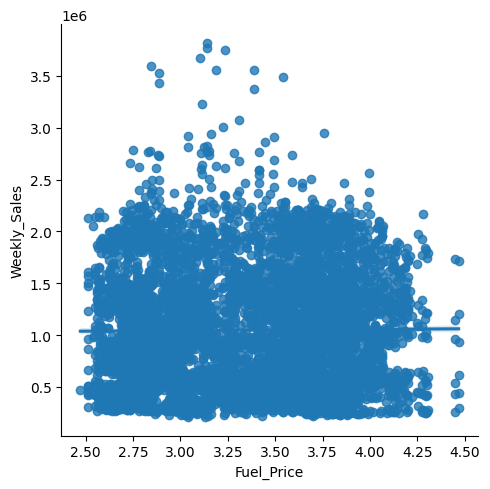

In [204]:
sns.lmplot(x='Fuel_Price',y='Weekly_Sales',data=df)

### Weekly_Sales vs CPI

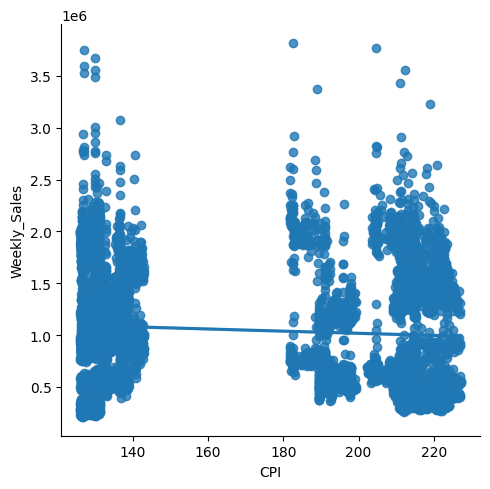

In [205]:
sns.lmplot(x='CPI',y='Weekly_Sales',data=df)

### Weekly_Sales vs Unemployment

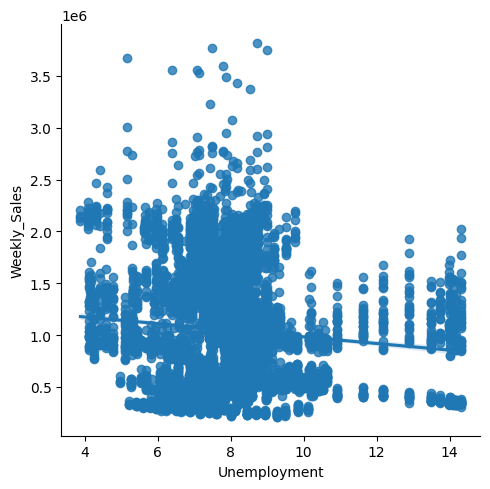

In [206]:
sns.lmplot(x='Unemployment',y='Weekly_Sales',data=df)

### Weekly_Sales vs Lag_1

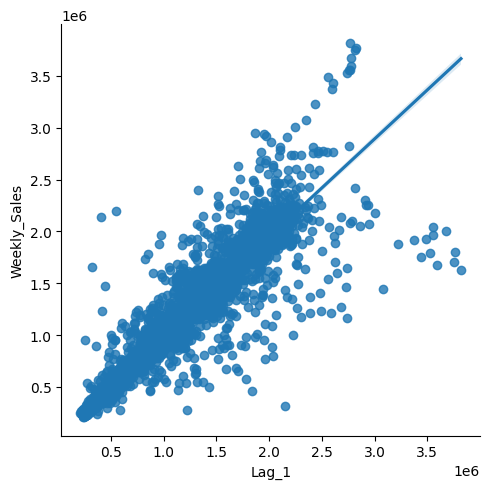

In [207]:
sns.lmplot(x='Lag_1',y='Weekly_Sales',data=df)

### Weekly_Sales vs Lag_2

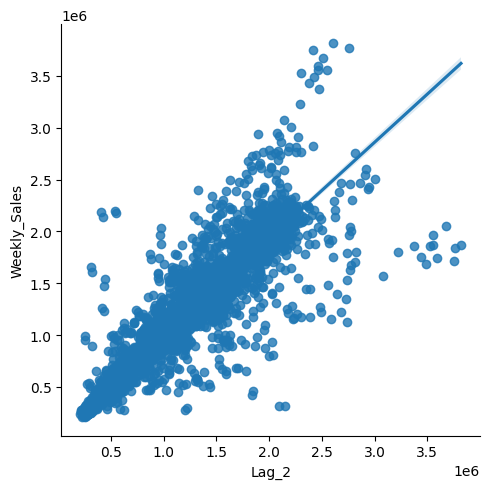

In [208]:
sns.lmplot(x='Lag_2',y='Weekly_Sales',data=df)

In [209]:
df.drop(['Store','Holiday_Flag'],axis=1,inplace=True)

In [210]:
df.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Time,Lag_1,Lag_2
Date,,,,,,,,
05-02-2010,1643690.90,42.31,2.572,211.096358,8.106,0.0,NaN,NaN
12-02-2010,1641957.44,38.51,2.548,211.242170,8.106,1.0,1643690.90,NaN
19-02-2010,1611968.17,39.93,2.514,211.289143,8.106,2.0,1641957.44,1643690.90
26-02-2010,1409727.59,46.63,2.561,211.319643,8.106,3.0,1611968.17,1641957.44
05-03-2010,1554806.68,46.50,2.625,211.350143,8.106,4.0,1409727.59,1611968.17


In [211]:
df.isnull().sum()

Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Time            0
Lag_1           1
Lag_2           2
dtype: int64

In [212]:
df = df.fillna(0)

In [213]:
df_train = df.iloc[:5148]
df_test = df.iloc[5149:]

In [214]:
df_train = df_train.reset_index()
X_train = df_train.loc[:,['Temperature','Fuel_Price','CPI','Unemployment','Time','Lag_1','Lag_2']]
y_train = df_train.loc[:,['Weekly_Sales']]

X_test = df_test.loc[:,['Temperature','Fuel_Price','CPI','Unemployment','Time','Lag_1','Lag_2']]
y_test = df_test.loc[:,['Weekly_Sales']]

In [215]:
# Normalization
scaler1 = StandardScaler() #(x-u)/sigma
'''
fit : Mean value, Standard_deviation(fit)
transform : x-Mean/standard_deviation    
'''
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

scaler2 = StandardScaler()
y_train = scaler2.fit_transform(y_train)
y_test = scaler2.transform(y_test)

In [216]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [217]:
y_pred = lin_reg.predict(X_test)
y_pred

array([[-1.11367763],
       [-0.97395031],
       [-0.998275  ],
       ...,
       [-0.66672361],
       [-0.65413089],
       [-0.67089828]])

In [218]:
lin_reg.coef_

array([[ 0.00405954, -0.00252064, -0.01418372, -0.00740986, -0.00633679,
         0.63474982,  0.32260259]])

In [219]:
lin_reg.intercept_

array([4.93743351e-17])

In [220]:
mean_squared_error(y_pred,y_test)

0.04381513140791686

In [221]:
lin_reg.score(X_test,y_test)

0.9030686306084199